#MOUNTING MY DRIVE IN THE ENVIRONMENT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/ProAnalytics_G4/dataset_template_req/Insurance Dataset.rar", outdir="/content")

     |████████████████████████████████| 81kB 3.4MB/s 
patool: Extracting /content/drive/MyDrive/ProAnalytics_G4/dataset_template_req/Insurance Dataset.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/ProAnalytics_G4/dataset_template_req/Insurance Dataset.rar"
patool:     with cwd='/content'
patool: ... /content/drive/MyDrive/ProAnalytics_G4/dataset_template_req/Insurance Dataset.rar extracted to `/content'.


'/content'

#IMPORTING LIBRARIES FOR PREPROCESSING


In [ ]:
#loading basic libraries for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###LOADING DATASET AND BASIC INFO 

In [ ]:
#Loading dataset in the environment
data= pd.read_csv(r"./Insurance Dataset.csv")

###MAKING COPY OF ORG DATA

In [ ]:
data1=data.copy()
data1=data1.drop_duplicates().reset_index(drop=True)

In [ ]:
data1.shape

(1043761, 24)

In [ ]:
data1.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [ ]:
data1.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

###COLUMN 7 NOISE HANDLING

In [ ]:
data1.iloc[:,7].unique().shape[0]

120

In [ ]:
d1=data1.iloc[:,7].values
d1=[v.replace(" +","") for v in d1]
data1.iloc[:,7]=d1
data1.iloc[:,7].unique().shape[0]

120

In [ ]:
data1.iloc[:,7].unique()

array(['4', '3', '1', '2', '5', '6', '14', '12', '9', '8', '10', '7',
       '22', '11', '16', '15', '25', '13', '17', '28', '18', '19', '23',
       '38', '20', '24', '26', '21', '27', '30', '29', '39', '87', '35',
       '37', '32', '55', '56', '49', '110', '69', '75', '42', '51', '47',
       '45', '46', '40', '34', '79', '43', '120', '65', '41', '31', '50',
       '59', '44', '36', '70', '115', '58', '94', '33', '68', '67', '54',
       '80', '85', '95', '78', '91', '88', '48', '52', '63', '57', '74',
       '64', '53', '62', '97', '72', '118', '81', '90', '86', '106',
       '112', '105', '114', '66', '89', '83', '84', '82', '93', '116',
       '71', '60', '73', '61', '92', '76', '96', '77', '104', '100',
       '103', '102', '117', '108', '99', '107', '98', '101', '119', '111',
       '109', '113'], dtype=object)

###DROPPING MISSING, NULL VALUES

In [ ]:
data1.dropna(inplace=True)

In [ ]:
percent=(data.shape[0]-data1.shape[0])/data.shape[0]*100
print("% of dropped missing records:",round(percent,3))

% of missing records: 0.697


In [ ]:
data1.reset_index(drop=True,inplace=True)
data1.shape

(1041265, 24)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041265 entries, 0 to 1043760
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  object 
 1   Hospital County                        1041265 non-null  object 
 2   Hospital Id                            1041265 non-null  float64
 3   Age                                    1041265 non-null  object 
 4   Gender                                 1041265 non-null  object 
 5   Cultural_group                         1041265 non-null  object 
 6   ethnicity                              1041265 non-null  object 
 7   Days_spend_hsptl                       1041265 non-null  object 
 8   Admission_type                         1041265 non-null  object 
 9   Home or self care,                     1041265 non-null  object 
 10  ccs_diagnosis_code                     104

In [ ]:
data1.info()

###DROPPING IRRELEVANT COLUMNS

In [ ]:
data2=data1.drop(["Hospital County","Hospital Id","Home or self care,","apr_drg_description","Emergency dept_yes/No","Tot_cost","Tot_charg"],axis=1)

In [ ]:
data2.shape


(1041265, 17)

###DIVIDING DATASET TO CATEGORICAL AND NUMERICAL 

In [ ]:
#placing the whole dataset into categorical and numerical for ease of operation
categ= data2.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,13,16]]
num=data2.iloc[:,[5,12,14]]

###ENCODING CATEGORICAL FEATURES

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
for i in range(categ.shape[1]):
  categ.iloc[:,i] = labelencoder.fit_transform(categ.iloc[:,i])


### CHANGING DTYPE OF COLUMN 7 TO NUMERICAL

In [ ]:
num["Days_spend_hsptl"]=num["Days_spend_hsptl"].astype("int64")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


###CHECKING CORRELATION IN NUMERICAL DATA

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(num.corr(), annot=True,  cmap= 'viridis')

###CHECKING CORRELATION IN CATEGORICAL DATA

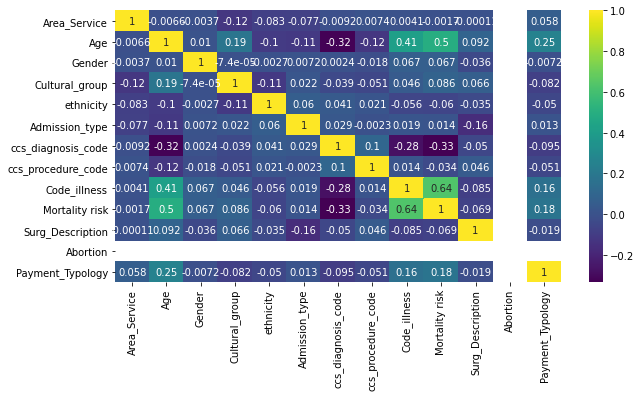

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(categ.corr(), annot=True, cmap= 'viridis')


###SCALING NUMERICAL BY ROBUSTSCALER AND CATEGORICAL BY MINMAXSCALER

In [ ]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler

In [ ]:
num.head()

,Days_spend_hsptl,Weight_baby,ratio_of_total_costs_to_total_charges
0,4,0,1.012798
1,4,0,1.079365
2,3,0,1.059379
3,1,0,1.484167
4,3,0,0.986161


In [ ]:
scaler=RobustScaler()
scaler1=MinMaxScaler()


In [ ]:
#for numerical data
num=pd.DataFrame(scaler.fit_transform(num))


In [ ]:
#for categorical data
categ=pd.DataFrame(scaler1.fit_transform(categ))

In [ ]:
#for numerical data
#data2.iloc[:,5]=scaler.fit_transform(data2.iloc[:,5].values.reshape(-1,1))
#data2.iloc[:,12]=scaler.fit_transform(data2.iloc[:,12].values.reshape(-1,1))
#data2.iloc[:,14]=scaler.fit_transform(data2.iloc[:,14].values.reshape(-1,1))

In [ ]:
#for categorical data
#data2.iloc[:,0]=scaler1.fit_transform(data2.iloc[:,0].values.reshape(-1,1))
#data2.iloc[:,1]=scaler.fit_transform(data2.iloc[:,1].values.reshape(-1,1))
#data2.iloc[:,2]=scaler.fit_transform(data2.iloc[:,2].values.reshape(-1,1))
#data2.iloc[:,3]=scaler.fit_transform(data2.iloc[:,3].values.reshape(-1,1))
#data2.iloc[:,4]=scaler.fit_transform(data2.iloc[:,4].values.reshape(-1,1))


### CONCAT NUM AND CATEG DATA AND ADD TARGET VARIABLE 
### SAVE PROCESSED DATASET FOR MODEL BUILDING
### RENAMING COLUMNS AS REFERENCE NOS 

In [ ]:
processed_data=pd.concat([categ, num], axis=1)
processed_data.columns=["I"+str(i) for i in range(processed_data.shape[1])]

In [ ]:
processed_data.columns

Index(['I0', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
       'I11', 'I12', 'I13', 'I14', 'I15'],
      dtype='object')

In [ ]:
processed_data["Result"]=data2.Result

In [ ]:
processed_data.head()

,I0,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Result
0,1.0,0.5,0.0,1.0,0.0,0.0,0.428016,0.0,0.000000,0.000000,0.0,0.0,0.0,0.25,0.0,2.940386,1
1,1.0,1.0,0.0,1.0,0.0,1.0,0.700389,0.0,0.666667,0.333333,0.0,0.0,0.0,0.25,0.0,3.264552,1
2,1.0,0.5,0.0,1.0,0.0,1.0,0.428016,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,3.167225,1
3,1.0,0.0,0.0,1.0,0.0,1.0,0.428016,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.50,0.0,5.235848,0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.428016,0.0,0.333333,0.666667,0.0,0.0,0.0,0.00,0.0,2.810670,1


In [ ]:
predictors=list(processed_data.columns)
target=predictors.pop(16)


In [ ]:
#c=data1.columns
#target="I22"
#predictors=[ w for w in c ] 
#predictors.pop(22)

'I22'

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(processed_data[predictors],
                                                     processed_data[target],
                                                    test_size=0.3, random_state=10)

In [ ]:

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((728885, 16), (728885,), (312380, 16), (312380,))

In [ ]:
from xgboost import XGBClassifier
model= XGBClassifier()

In [ ]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.75      0.86    312376

    accuracy                           0.75    312380
   macro avg       0.50      0.37      0.43    312380
weighted avg       1.00      0.75      0.86    312380



In [ ]:
pd.Series(y_pred).value_counts()

1    312380
dtype: int64